In [8]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 64
num_classes = 1
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28



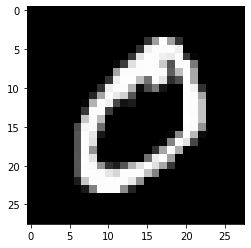

0


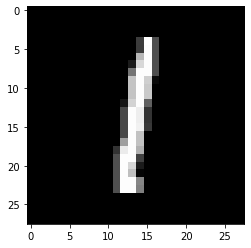

1


100%|██████████| 6742/6742 [00:12<00:00, 550.06it/s]


In [7]:

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import csv
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.transform import rotate
from keras.models import Sequential
from keras.layers import Dense


trainxs = []
trainximgs = []
trainys = []

DATADIR = r"C:\Users\colly\Desktop\mnist\mnist_png"

CATEGORIES = ["0", "1"]
#CATEGORIES = ["out_square", "in_square", "on_line"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category) 
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        print(class_num)
          # we just want one for now so break
        break


for category in CATEGORIES:  

    path = os.path.join(DATADIR,category)  
    class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=notinsquare 1=insquare

    for img in tqdm(os.listdir(path)):  # iterate over each image per point value
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array 
        new_img_array = rotate(img_array, 90)
        new_img_array1 = rotate(img_array, 180)
        new_img_array2 = rotate(img_array, 270)

        trainys.append(class_num)
        trainys.append(class_num)
        trainys.append(class_num)
        trainys.append(class_num)
        trainxs.append(new_img_array)
        trainxs.append(new_img_array1)
        trainxs.append(new_img_array2)
        trainxs.append(img_array)
            


In [9]:
from sklearn.model_selection import train_test_split

trainxs1 = np.asarray(trainxs, dtype=np.float32)
trainys1 = np.asarray(trainys, dtype=np.float32)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(trainxs1, trainys1, test_size=0.2, random_state=42)


print(x_train.shape)

(40528, 28, 28)


In [10]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train.shape

(40528, 28, 28, 1)

In [11]:
print("yes")
print('x_train shape:', x_train.shape)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

#print(x_train[3])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

yes
x_train shape: (40528, 28, 28, 1)
x_train shape: (40528, 28, 28, 1)
40528 train samples
10132 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________

In [12]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40528 samples, validate on 10132 samples
Epoch 1/5


11776/40528 [=======>......................] - ETA: 7:45 - loss: 0.6985 - accuracy: 0.62 - ETA: 5:06 - loss: 0.6868 - accuracy: 0.60 - ETA: 4:13 - loss: 0.6777 - accuracy: 0.61 - ETA: 3:44 - loss: 0.6574 - accuracy: 0.62 - ETA: 3:27 - loss: 0.6494 - accuracy: 0.62 - ETA: 3:17 - loss: 0.6402 - accuracy: 0.62 - ETA: 3:07 - loss: 0.6275 - accuracy: 0.60 - ETA: 3:01 - loss: 0.6199 - accuracy: 0.61 - ETA: 2:58 - loss: 0.6090 - accuracy: 0.63 - ETA: 2:55 - loss: 0.6020 - accuracy: 0.63 - ETA: 2:51 - loss: 0.5978 - accuracy: 0.62 - ETA: 2:47 - loss: 0.5932 - accuracy: 0.62 - ETA: 2:45 - loss: 0.5839 - accuracy: 0.63 - ETA: 2:43 - loss: 0.5805 - accuracy: 0.62 - ETA: 2:42 - loss: 0.5740 - accuracy: 0.62 - ETA: 2:40 - loss: 0.5701 - accuracy: 0.62 - ETA: 2:39 - loss: 0.5665 - accuracy: 0.63 - ETA: 2:38 - loss: 0.5632 - accuracy: 0.63 - ETA: 2:36 - loss: 0.5634 - accuracy: 0.63 - ETA: 2:35 - loss: 0.5595 - accuracy: 0.63 - ETA: 2:34 - loss: 0.5612 - accuracy: 0.62 - ETA: 2:32 - loss: 0.5613 - ac

23680/40528 [================>.............] - ETA: 1:49 - loss: 0.4929 - accuracy: 0.76 - ETA: 1:48 - loss: 0.4915 - accuracy: 0.76 - ETA: 1:48 - loss: 0.4902 - accuracy: 0.76 - ETA: 1:48 - loss: 0.4892 - accuracy: 0.76 - ETA: 1:48 - loss: 0.4900 - accuracy: 0.76 - ETA: 1:47 - loss: 0.4891 - accuracy: 0.76 - ETA: 1:47 - loss: 0.4882 - accuracy: 0.76 - ETA: 1:47 - loss: 0.4869 - accuracy: 0.76 - ETA: 1:46 - loss: 0.4859 - accuracy: 0.77 - ETA: 1:46 - loss: 0.4851 - accuracy: 0.77 - ETA: 1:46 - loss: 0.4840 - accuracy: 0.77 - ETA: 1:46 - loss: 0.4827 - accuracy: 0.77 - ETA: 1:45 - loss: 0.4816 - accuracy: 0.77 - ETA: 1:45 - loss: 0.4836 - accuracy: 0.77 - ETA: 1:45 - loss: 0.4850 - accuracy: 0.77 - ETA: 1:45 - loss: 0.4839 - accuracy: 0.77 - ETA: 1:44 - loss: 0.4838 - accuracy: 0.77 - ETA: 1:44 - loss: 0.4826 - accuracy: 0.77 - ETA: 1:44 - loss: 0.4815 - accuracy: 0.77 - ETA: 1:44 - loss: 0.4803 - accuracy: 0.77 - ETA: 1:43 - loss: 0.4791 - accuracy: 0.78 - ETA: 1:43 - loss: 0.4780 - ac

35584/40528 [=========================>....] - ETA: 1:04 - loss: 0.3455 - accuracy: 0.87 - ETA: 1:04 - loss: 0.3447 - accuracy: 0.87 - ETA: 1:04 - loss: 0.3439 - accuracy: 0.87 - ETA: 1:03 - loss: 0.3431 - accuracy: 0.87 - ETA: 1:03 - loss: 0.3424 - accuracy: 0.87 - ETA: 1:03 - loss: 0.3416 - accuracy: 0.87 - ETA: 1:03 - loss: 0.3408 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3400 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3391 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3384 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3375 - accuracy: 0.87 - ETA: 1:01 - loss: 0.3378 - accuracy: 0.87 - ETA: 1:01 - loss: 0.3395 - accuracy: 0.87 - ETA: 1:01 - loss: 0.3431 - accuracy: 0.87 - ETA: 1:01 - loss: 0.3423 - accuracy: 0.87 - ETA: 1:00 - loss: 0.3421 - accuracy: 0.87 - ETA: 1:00 - loss: 0.3413 - accuracy: 0.87 - ETA: 1:00 - loss: 0.3405 - accuracy: 0.87 - ETA: 1:00 - loss: 0.3398 - accuracy: 0.87 - ETA: 59s - loss: 0.3390 - accuracy: 0.8763 - ETA: 59s - loss: 0.3382 - accuracy: 0.876 - ETA: 59s - loss: 0.3374 - ac

40528/40528 [==============================] - ETA: 18s - loss: 0.2600 - accuracy: 0.910 - ETA: 18s - loss: 0.2596 - accuracy: 0.910 - ETA: 17s - loss: 0.2594 - accuracy: 0.910 - ETA: 17s - loss: 0.2590 - accuracy: 0.910 - ETA: 17s - loss: 0.2585 - accuracy: 0.911 - ETA: 17s - loss: 0.2581 - accuracy: 0.911 - ETA: 16s - loss: 0.2578 - accuracy: 0.911 - ETA: 16s - loss: 0.2574 - accuracy: 0.911 - ETA: 16s - loss: 0.2569 - accuracy: 0.911 - ETA: 16s - loss: 0.2566 - accuracy: 0.911 - ETA: 15s - loss: 0.2567 - accuracy: 0.911 - ETA: 15s - loss: 0.2563 - accuracy: 0.911 - ETA: 15s - loss: 0.2559 - accuracy: 0.912 - ETA: 15s - loss: 0.2554 - accuracy: 0.912 - ETA: 14s - loss: 0.2550 - accuracy: 0.912 - ETA: 14s - loss: 0.2546 - accuracy: 0.912 - ETA: 14s - loss: 0.2542 - accuracy: 0.912 - ETA: 14s - loss: 0.2538 - accuracy: 0.912 - ETA: 13s - loss: 0.2534 - accuracy: 0.912 - ETA: 13s - loss: 0.2530 - accuracy: 0.913 - ETA: 13s - loss: 0.2526 - accuracy: 0.913 - ETA: 13s - loss: 0.2522 - acc

11904/40528 [=======>......................] - ETA: 2:37 - loss: 0.0132 - accuracy: 1.00 - ETA: 2:30 - loss: 0.0107 - accuracy: 1.00 - ETA: 2:30 - loss: 0.0144 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0140 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0134 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0143 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0141 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0130 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0146 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0144 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0148 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0140 - accuracy: 0.99 - ETA: 2:22 - loss: 0.0134 - accuracy: 0.99 - ETA: 2:22 - loss: 0.0129 - accuracy: 0.99 - ETA: 2:22 - loss: 0.0134 - accuracy: 0.99 - ETA: 2:22 - loss: 0.0135 - accuracy: 0.99 - ETA: 2:22 - loss: 0.0179 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0173 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0171 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0177 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0173 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0206 - ac

23808/40528 [================>.............] - ETA: 1:42 - loss: 0.0522 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0520 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0524 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0522 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0519 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0519 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0517 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0515 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0513 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0512 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0510 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0509 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0506 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0517 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0515 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0513 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0511 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0509 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0507 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0505 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0536 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0537 - ac

35712/40528 [=========================>....] - ETA: 1:00 - loss: 0.0626 - accuracy: 0.99 - ETA: 59s - loss: 0.0625 - accuracy: 0.9919 - ETA: 59s - loss: 0.0624 - accuracy: 0.992 - ETA: 59s - loss: 0.0622 - accuracy: 0.992 - ETA: 59s - loss: 0.0621 - accuracy: 0.992 - ETA: 58s - loss: 0.0619 - accuracy: 0.992 - ETA: 58s - loss: 0.0620 - accuracy: 0.992 - ETA: 58s - loss: 0.0619 - accuracy: 0.992 - ETA: 58s - loss: 0.0619 - accuracy: 0.992 - ETA: 57s - loss: 0.0618 - accuracy: 0.991 - ETA: 57s - loss: 0.0617 - accuracy: 0.992 - ETA: 57s - loss: 0.0616 - accuracy: 0.991 - ETA: 57s - loss: 0.0616 - accuracy: 0.991 - ETA: 56s - loss: 0.0615 - accuracy: 0.991 - ETA: 56s - loss: 0.0613 - accuracy: 0.991 - ETA: 56s - loss: 0.0613 - accuracy: 0.991 - ETA: 56s - loss: 0.0612 - accuracy: 0.991 - ETA: 55s - loss: 0.0611 - accuracy: 0.991 - ETA: 55s - loss: 0.0610 - accuracy: 0.991 - ETA: 55s - loss: 0.0608 - accuracy: 0.991 - ETA: 55s - loss: 0.0607 - accuracy: 0.991 - ETA: 55s - loss: 0.0606 - ac

40528/40528 [==============================] - ETA: 16s - loss: 0.0551 - accuracy: 0.992 - ETA: 16s - loss: 0.0550 - accuracy: 0.992 - ETA: 16s - loss: 0.0551 - accuracy: 0.992 - ETA: 16s - loss: 0.0550 - accuracy: 0.992 - ETA: 16s - loss: 0.0550 - accuracy: 0.992 - ETA: 15s - loss: 0.0549 - accuracy: 0.992 - ETA: 15s - loss: 0.0548 - accuracy: 0.992 - ETA: 15s - loss: 0.0547 - accuracy: 0.992 - ETA: 15s - loss: 0.0546 - accuracy: 0.992 - ETA: 14s - loss: 0.0546 - accuracy: 0.992 - ETA: 14s - loss: 0.0545 - accuracy: 0.992 - ETA: 14s - loss: 0.0545 - accuracy: 0.992 - ETA: 14s - loss: 0.0545 - accuracy: 0.992 - ETA: 13s - loss: 0.0544 - accuracy: 0.992 - ETA: 13s - loss: 0.0544 - accuracy: 0.992 - ETA: 13s - loss: 0.0543 - accuracy: 0.992 - ETA: 13s - loss: 0.0542 - accuracy: 0.992 - ETA: 13s - loss: 0.0541 - accuracy: 0.992 - ETA: 12s - loss: 0.0540 - accuracy: 0.992 - ETA: 12s - loss: 0.0540 - accuracy: 0.992 - ETA: 12s - loss: 0.0539 - accuracy: 0.992 - ETA: 12s - loss: 0.0539 - acc

11904/40528 [=======>......................] - ETA: 2:14 - loss: 0.0046 - accuracy: 1.00 - ETA: 2:16 - loss: 0.0326 - accuracy: 0.98 - ETA: 2:16 - loss: 0.0276 - accuracy: 0.98 - ETA: 2:17 - loss: 0.0213 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0192 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0167 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0164 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0149 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0144 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0160 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0148 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0140 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0141 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0133 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0127 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0121 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0119 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0114 - accuracy: 0.99 - ETA: 2:12 - loss: 0.0120 - accuracy: 0.99 - ETA: 2:12 - loss: 0.0116 - accuracy: 0.99 - ETA: 2:12 - loss: 0.0120 - accuracy: 0.99 - ETA: 2:12 - loss: 0.0116 - ac

23808/40528 [================>.............] - ETA: 1:41 - loss: 0.0414 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0412 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0410 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0408 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0406 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0404 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0406 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0404 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0404 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0404 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0402 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0401 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0400 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0398 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0398 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0396 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0395 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0393 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0391 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0390 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0389 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0388 - ac

35712/40528 [=========================>....] - ETA: 57s - loss: 0.0333 - accuracy: 0.994 - ETA: 57s - loss: 0.0333 - accuracy: 0.994 - ETA: 57s - loss: 0.0334 - accuracy: 0.994 - ETA: 57s - loss: 0.0335 - accuracy: 0.994 - ETA: 57s - loss: 0.0335 - accuracy: 0.994 - ETA: 56s - loss: 0.0335 - accuracy: 0.994 - ETA: 56s - loss: 0.0334 - accuracy: 0.994 - ETA: 56s - loss: 0.0333 - accuracy: 0.994 - ETA: 56s - loss: 0.0334 - accuracy: 0.994 - ETA: 55s - loss: 0.0333 - accuracy: 0.994 - ETA: 55s - loss: 0.0332 - accuracy: 0.994 - ETA: 55s - loss: 0.0333 - accuracy: 0.994 - ETA: 55s - loss: 0.0332 - accuracy: 0.994 - ETA: 55s - loss: 0.0332 - accuracy: 0.994 - ETA: 54s - loss: 0.0331 - accuracy: 0.994 - ETA: 54s - loss: 0.0330 - accuracy: 0.994 - ETA: 54s - loss: 0.0330 - accuracy: 0.994 - ETA: 54s - loss: 0.0329 - accuracy: 0.994 - ETA: 53s - loss: 0.0328 - accuracy: 0.994 - ETA: 53s - loss: 0.0327 - accuracy: 0.994 - ETA: 53s - loss: 0.0327 - accuracy: 0.994 - ETA: 53s - loss: 0.0327 - acc

40528/40528 [==============================] - ETA: 16s - loss: 0.0330 - accuracy: 0.994 - ETA: 16s - loss: 0.0330 - accuracy: 0.994 - ETA: 16s - loss: 0.0329 - accuracy: 0.994 - ETA: 15s - loss: 0.0329 - accuracy: 0.994 - ETA: 15s - loss: 0.0328 - accuracy: 0.994 - ETA: 15s - loss: 0.0328 - accuracy: 0.994 - ETA: 15s - loss: 0.0328 - accuracy: 0.994 - ETA: 14s - loss: 0.0327 - accuracy: 0.994 - ETA: 14s - loss: 0.0327 - accuracy: 0.994 - ETA: 14s - loss: 0.0326 - accuracy: 0.994 - ETA: 14s - loss: 0.0326 - accuracy: 0.994 - ETA: 14s - loss: 0.0325 - accuracy: 0.994 - ETA: 13s - loss: 0.0325 - accuracy: 0.994 - ETA: 13s - loss: 0.0324 - accuracy: 0.994 - ETA: 13s - loss: 0.0331 - accuracy: 0.994 - ETA: 13s - loss: 0.0331 - accuracy: 0.994 - ETA: 12s - loss: 0.0330 - accuracy: 0.994 - ETA: 12s - loss: 0.0330 - accuracy: 0.994 - ETA: 12s - loss: 0.0330 - accuracy: 0.994 - ETA: 12s - loss: 0.0329 - accuracy: 0.994 - ETA: 12s - loss: 0.0329 - accuracy: 0.994 - ETA: 11s - loss: 0.0328 - acc

11904/40528 [=======>......................] - ETA: 2:18 - loss: 0.0092 - accuracy: 1.00 - ETA: 2:27 - loss: 0.0059 - accuracy: 1.00 - ETA: 2:38 - loss: 0.0047 - accuracy: 1.00 - ETA: 2:32 - loss: 0.0039 - accuracy: 1.00 - ETA: 2:29 - loss: 0.0136 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0117 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0173 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0157 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0143 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0140 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0149 - accuracy: 0.99 - ETA: 2:22 - loss: 0.0147 - accuracy: 0.99 - ETA: 2:22 - loss: 0.0138 - accuracy: 0.99 - ETA: 2:22 - loss: 0.0130 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0122 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0118 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0112 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0162 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0155 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0151 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0145 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0139 - ac

23808/40528 [================>.............] - ETA: 1:40 - loss: 0.0208 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0207 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0206 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0205 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0207 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0206 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0207 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0208 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0208 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0208 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0207 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0206 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0205 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0204 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0204 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0203 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0204 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0203 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0202 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0201 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0201 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0200 - ac

35712/40528 [=========================>....] - ETA: 57s - loss: 0.0213 - accuracy: 0.995 - ETA: 57s - loss: 0.0213 - accuracy: 0.995 - ETA: 57s - loss: 0.0212 - accuracy: 0.995 - ETA: 56s - loss: 0.0212 - accuracy: 0.995 - ETA: 56s - loss: 0.0212 - accuracy: 0.995 - ETA: 56s - loss: 0.0212 - accuracy: 0.995 - ETA: 56s - loss: 0.0211 - accuracy: 0.995 - ETA: 56s - loss: 0.0211 - accuracy: 0.995 - ETA: 55s - loss: 0.0211 - accuracy: 0.995 - ETA: 55s - loss: 0.0211 - accuracy: 0.995 - ETA: 55s - loss: 0.0211 - accuracy: 0.995 - ETA: 55s - loss: 0.0210 - accuracy: 0.995 - ETA: 54s - loss: 0.0210 - accuracy: 0.995 - ETA: 54s - loss: 0.0211 - accuracy: 0.995 - ETA: 54s - loss: 0.0210 - accuracy: 0.995 - ETA: 54s - loss: 0.0210 - accuracy: 0.995 - ETA: 54s - loss: 0.0210 - accuracy: 0.995 - ETA: 53s - loss: 0.0209 - accuracy: 0.995 - ETA: 53s - loss: 0.0209 - accuracy: 0.995 - ETA: 53s - loss: 0.0208 - accuracy: 0.995 - ETA: 53s - loss: 0.0208 - accuracy: 0.995 - ETA: 52s - loss: 0.0207 - acc

40528/40528 [==============================] - ETA: 16s - loss: 0.0196 - accuracy: 0.995 - ETA: 16s - loss: 0.0197 - accuracy: 0.995 - ETA: 15s - loss: 0.0196 - accuracy: 0.995 - ETA: 15s - loss: 0.0196 - accuracy: 0.995 - ETA: 15s - loss: 0.0196 - accuracy: 0.995 - ETA: 15s - loss: 0.0196 - accuracy: 0.995 - ETA: 15s - loss: 0.0195 - accuracy: 0.995 - ETA: 14s - loss: 0.0195 - accuracy: 0.995 - ETA: 14s - loss: 0.0195 - accuracy: 0.995 - ETA: 14s - loss: 0.0195 - accuracy: 0.995 - ETA: 14s - loss: 0.0195 - accuracy: 0.995 - ETA: 13s - loss: 0.0195 - accuracy: 0.995 - ETA: 13s - loss: 0.0195 - accuracy: 0.995 - ETA: 13s - loss: 0.0195 - accuracy: 0.995 - ETA: 13s - loss: 0.0194 - accuracy: 0.995 - ETA: 13s - loss: 0.0203 - accuracy: 0.995 - ETA: 12s - loss: 0.0203 - accuracy: 0.995 - ETA: 12s - loss: 0.0202 - accuracy: 0.995 - ETA: 12s - loss: 0.0202 - accuracy: 0.995 - ETA: 12s - loss: 0.0203 - accuracy: 0.995 - ETA: 11s - loss: 0.0205 - accuracy: 0.995 - ETA: 11s - loss: 0.0205 - acc

11904/40528 [=======>......................] - ETA: 2:18 - loss: 0.0112 - accuracy: 1.00 - ETA: 2:19 - loss: 0.0079 - accuracy: 1.00 - ETA: 2:22 - loss: 0.0067 - accuracy: 1.00 - ETA: 2:22 - loss: 0.0058 - accuracy: 1.00 - ETA: 2:20 - loss: 0.0055 - accuracy: 1.00 - ETA: 2:20 - loss: 0.0050 - accuracy: 1.00 - ETA: 2:21 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0072 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0069 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0065 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0067 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0137 - accuracy: 0.99 - ETA: 2:22 - loss: 0.0135 - accuracy: 0.99 - ETA: 2:22 - loss: 0.0131 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0124 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0137 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0132 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0143 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0137 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0355 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0345 - ac

23808/40528 [================>.............] - ETA: 1:39 - loss: 0.0213 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0212 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0211 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0210 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0209 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0208 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0209 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0209 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0209 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0208 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0207 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0206 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0205 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0204 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0203 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0202 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0201 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0200 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0200 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0199 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0199 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0198 - ac

35712/40528 [=========================>....] - ETA: 57s - loss: 0.0191 - accuracy: 0.995 - ETA: 57s - loss: 0.0190 - accuracy: 0.995 - ETA: 57s - loss: 0.0190 - accuracy: 0.995 - ETA: 56s - loss: 0.0189 - accuracy: 0.995 - ETA: 56s - loss: 0.0189 - accuracy: 0.995 - ETA: 56s - loss: 0.0188 - accuracy: 0.995 - ETA: 56s - loss: 0.0188 - accuracy: 0.995 - ETA: 55s - loss: 0.0187 - accuracy: 0.995 - ETA: 55s - loss: 0.0187 - accuracy: 0.995 - ETA: 55s - loss: 0.0187 - accuracy: 0.995 - ETA: 55s - loss: 0.0186 - accuracy: 0.995 - ETA: 55s - loss: 0.0186 - accuracy: 0.995 - ETA: 54s - loss: 0.0186 - accuracy: 0.995 - ETA: 54s - loss: 0.0185 - accuracy: 0.995 - ETA: 54s - loss: 0.0185 - accuracy: 0.995 - ETA: 54s - loss: 0.0185 - accuracy: 0.995 - ETA: 54s - loss: 0.0185 - accuracy: 0.995 - ETA: 53s - loss: 0.0185 - accuracy: 0.995 - ETA: 53s - loss: 0.0184 - accuracy: 0.995 - ETA: 53s - loss: 0.0184 - accuracy: 0.995 - ETA: 53s - loss: 0.0183 - accuracy: 0.995 - ETA: 52s - loss: 0.0183 - acc

40528/40528 [==============================] - ETA: 16s - loss: 0.0185 - accuracy: 0.995 - ETA: 16s - loss: 0.0184 - accuracy: 0.995 - ETA: 15s - loss: 0.0184 - accuracy: 0.995 - ETA: 15s - loss: 0.0184 - accuracy: 0.995 - ETA: 15s - loss: 0.0184 - accuracy: 0.995 - ETA: 15s - loss: 0.0183 - accuracy: 0.995 - ETA: 15s - loss: 0.0183 - accuracy: 0.995 - ETA: 14s - loss: 0.0183 - accuracy: 0.995 - ETA: 14s - loss: 0.0182 - accuracy: 0.995 - ETA: 14s - loss: 0.0182 - accuracy: 0.995 - ETA: 14s - loss: 0.0182 - accuracy: 0.995 - ETA: 13s - loss: 0.0182 - accuracy: 0.995 - ETA: 13s - loss: 0.0181 - accuracy: 0.995 - ETA: 13s - loss: 0.0181 - accuracy: 0.995 - ETA: 13s - loss: 0.0181 - accuracy: 0.995 - ETA: 13s - loss: 0.0181 - accuracy: 0.995 - ETA: 12s - loss: 0.0181 - accuracy: 0.995 - ETA: 12s - loss: 0.0181 - accuracy: 0.995 - ETA: 12s - loss: 0.0181 - accuracy: 0.995 - ETA: 12s - loss: 0.0183 - accuracy: 0.995 - ETA: 11s - loss: 0.0183 - accuracy: 0.995 - ETA: 11s - loss: 0.0183 - acc